# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offerings, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all of the LEGO pieces in existence.

<img src="assets/bricks.jpg"></img>

# Import Statements

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [9]:
df = pd.read_csv('data/colors.csv')
print(df.head())

   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f


In [10]:
df['name'].nunique()

135

In [11]:
df[df.is_trans == 't'].count()

id          28
name        28
rgb         28
is_trans    28
dtype: int64

In [12]:
df[df.is_trans == 'f'].count()

id          107
name        107
rgb         107
is_trans    107
dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organized by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="assets/lego_themes.png"></img>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="assets/lego_sets.png"></img>

In [13]:
df2 = pd.read_csv("data/sets.csv")

In [14]:
df2.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [15]:
df2.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [16]:
df2.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [17]:
df2[df2.year == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [18]:
df2.sort_values(by=['num_parts'], ascending=False)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
...,...,...,...,...,...
1782,20216-1,MBA Robot & Micro Designer (Kits 2 - 3 Redesign),2013,432,0
1780,20214-1,MBA Adventure Designer (Kits 7 - 9 Redesign),2013,432,0
6822,5005539-1,Brick Pouch (Yellow),2018,501,0
9026,66319-1,Power Miners 3 in 1 Superpack,2009,439,0


In [19]:
df2.groupby('year').count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [20]:
sets_by_year = df2.groupby('year').count()
print(sets_by_year['set_num'].head())

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64


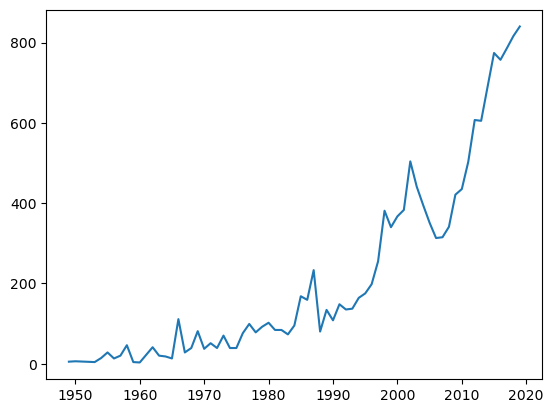

In [21]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [22]:
themes_by_year = df2.groupby('year').agg({'theme_id': pd.Series.nunique})

In [23]:
themes_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)
print(themes_by_year.head())
print(themes_by_year.tail())

      nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4
      nr_themes
year           
2017         89
2018         93
2019         78
2020         82
2021          1


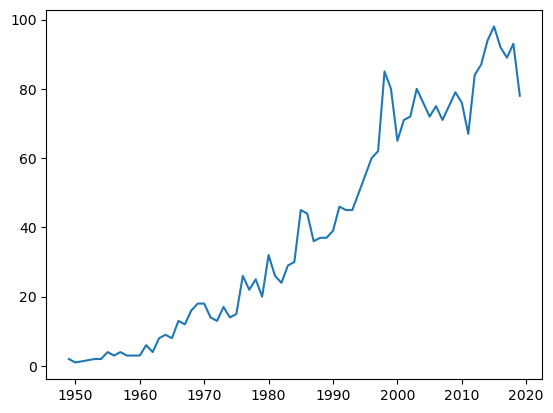

In [24]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.show()

### Line Charts with Two Seperate Axes

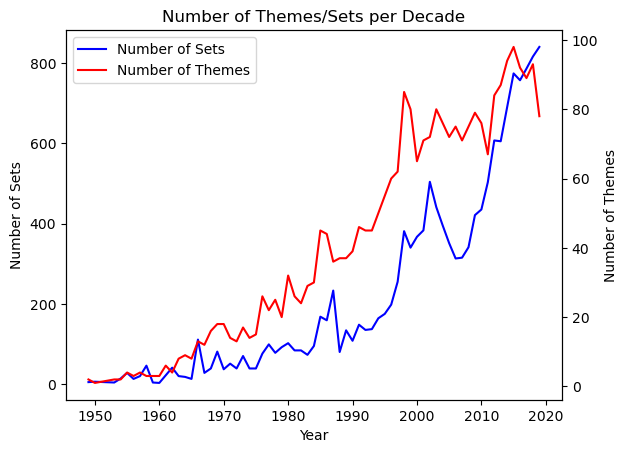

In [25]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], '-b', label='Number of Sets')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], '-r', label="Number of Themes")
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets')
ax2.set_ylabel('Number of Themes')
ax1.set_title('Number of Themes/Sets per Decade')

lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines])

plt.show()

Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to 2017?

In [26]:
parts_per_set = df2.groupby('year').agg({'num_parts': pd.Series.mean})

### Scatter Plots in Matplotlib

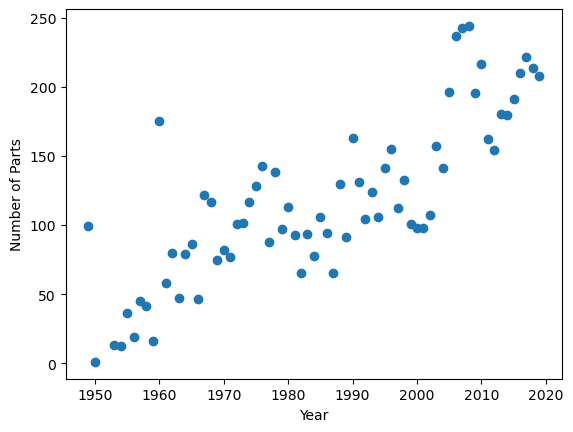

In [27]:
fig, ax = plt.subplots()

x = parts_per_set.index[:-2]
y = parts_per_set.num_parts[:-2]
ax.scatter(x, y)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Parts')

plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Superheroes to many others, but which theme has the largest number of individual sets? 

<img src='assets/rebrickable_schema.png'></img>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

How is themes.csv structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv.

In [28]:
set_theme_count = df2['theme_id'].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [30]:
df3 = pd.read_csv('data/themes.csv')
df3.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [31]:
df3[df3.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [32]:
df2[df2.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [33]:
df2[df2.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging DataFrames based on a Key


In [34]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index,
                                'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [35]:
merged_df = pd.merge(set_theme_count, df3, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

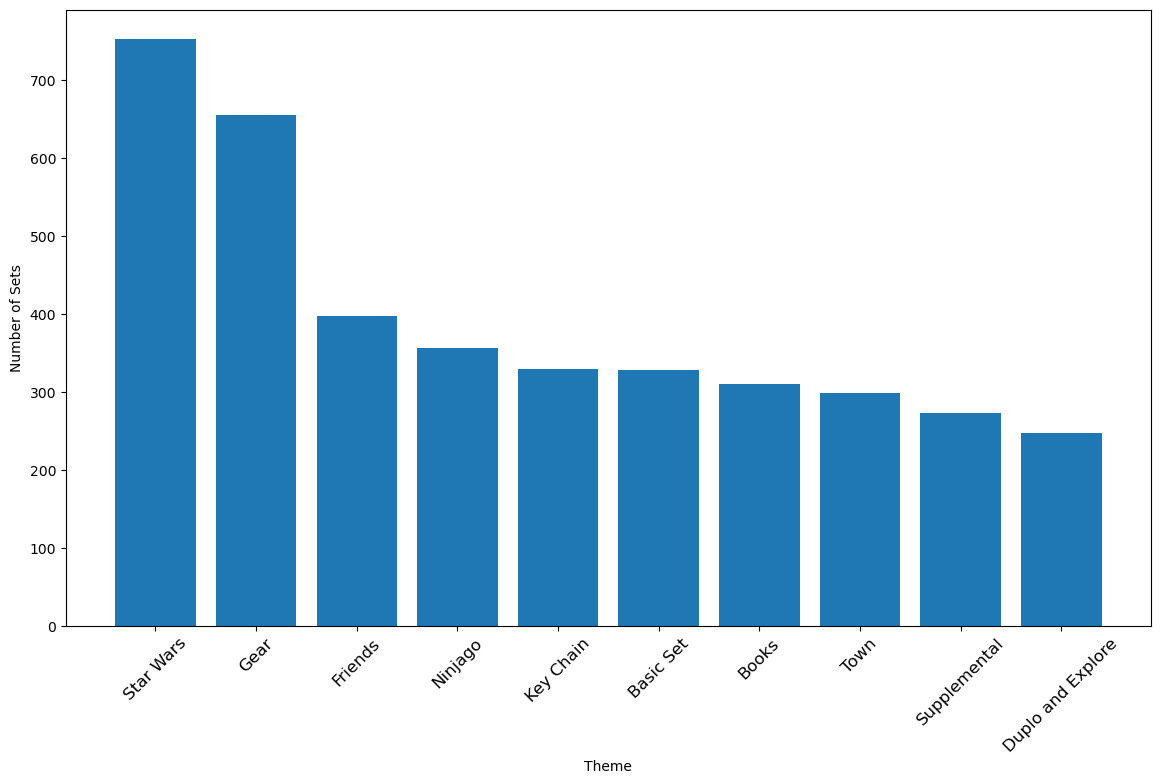

In [43]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=12, rotation=45)
plt.xlabel('Theme')
plt.ylabel('Number of Sets')

plt.bar(merged_df.name[:10], merged_df.set_count[:10])